In [37]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [38]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))

In [39]:
len(filenames)

3559

In [40]:
#Importing ResNet model and configuration
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False
model=tf.keras.models.Sequential([model,GlobalMaxPool2D()])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_3               │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [41]:
#Extracting the features from images
img = image.load_img('1939.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([0.01331316, 0.02903723, 0.00919929, ..., 0.00042253, 0.02278457,
       0.        ], dtype=float32)

In [42]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [43]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


array([0.02542341, 0.01708178, 0.01437495, ..., 0.02079255, 0.01957689,
       0.00300805], dtype=float32)

In [45]:
image_features = []
for file in filenames[0:1800]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[array([0.02542341, 0.01708178, 0.01437495, ..., 0.02079255, 0.01957689,
        0.00300805], dtype=float32),
 array([0.01531755, 0.01366073, 0.00615109, ..., 0.00607644, 0.01700663,
        0.0027747 ], dtype=float32),
 array([0.01799133, 0.        , 0.        , ..., 0.00904572, 0.02474403,
        0.        ], dtype=float32),
 array([0.03507435, 0.        , 0.01958955, ..., 0.00326924, 0.02910419,
        0.        ], dtype=float32),
 array([0.02732958, 0.01106211, 0.01684086, ..., 0.        , 0.02068718,
        0.01007236], dtype=float32),
 array([0.00627218, 0.        , 0.01081753, ..., 0.00187873, 0.0406263 ,
        0.00944417], dtype=float32),
 array([0.02630252, 0.        , 0.01120776, ..., 0.00628664, 0.0383299 ,
        0.0092931 ], dtype=float32),
 array([0.        , 0.00080536, 0.00620959, ..., 0.00174603, 0.        ,
        0.01790211], dtype=float32),
 array([0.00288618, 0.01485009, 0.00309879, ..., 0.00503929, 0.00553024,
        0.01647742], dtype=float32),
 array([0.

In [46]:
image_features

[array([0.02542341, 0.01708178, 0.01437495, ..., 0.02079255, 0.01957689,
        0.00300805], dtype=float32),
 array([0.01531755, 0.01366073, 0.00615109, ..., 0.00607644, 0.01700663,
        0.0027747 ], dtype=float32),
 array([0.01799133, 0.        , 0.        , ..., 0.00904572, 0.02474403,
        0.        ], dtype=float32),
 array([0.03507435, 0.        , 0.01958955, ..., 0.00326924, 0.02910419,
        0.        ], dtype=float32),
 array([0.02732958, 0.01106211, 0.01684086, ..., 0.        , 0.02068718,
        0.01007236], dtype=float32),
 array([0.00627218, 0.        , 0.01081753, ..., 0.00187873, 0.0406263 ,
        0.00944417], dtype=float32),
 array([0.02630252, 0.        , 0.01120776, ..., 0.00628664, 0.0383299 ,
        0.0092931 ], dtype=float32),
 array([0.        , 0.00080536, 0.00620959, ..., 0.00174603, 0.        ,
        0.01790211], dtype=float32),
 array([0.00288618, 0.01485009, 0.00309879, ..., 0.00503929, 0.00553024,
        0.01647742], dtype=float32),
 array([0.

In [47]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [48]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [49]:
#Loading pickle files
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [50]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [51]:
np.array(Image_features).shape

(1800, 2048)

In [52]:
#Finding similar images
Image_features = np.array(Image_features)
Image_features = Image_features.reshape(Image_features.shape[0], -1)
neighbors=NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [103]:
input_image=extract_features_from_images('1939.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


In [104]:
input_image = np.array(input_image)  
input_image = input_image.reshape(1, -1) 
distance, indices = neighbors.kneighbors(input_image)

In [105]:
indices

array([[239,   4,  25, 247, 243, 796]])

In [106]:
from IPython.display import Image

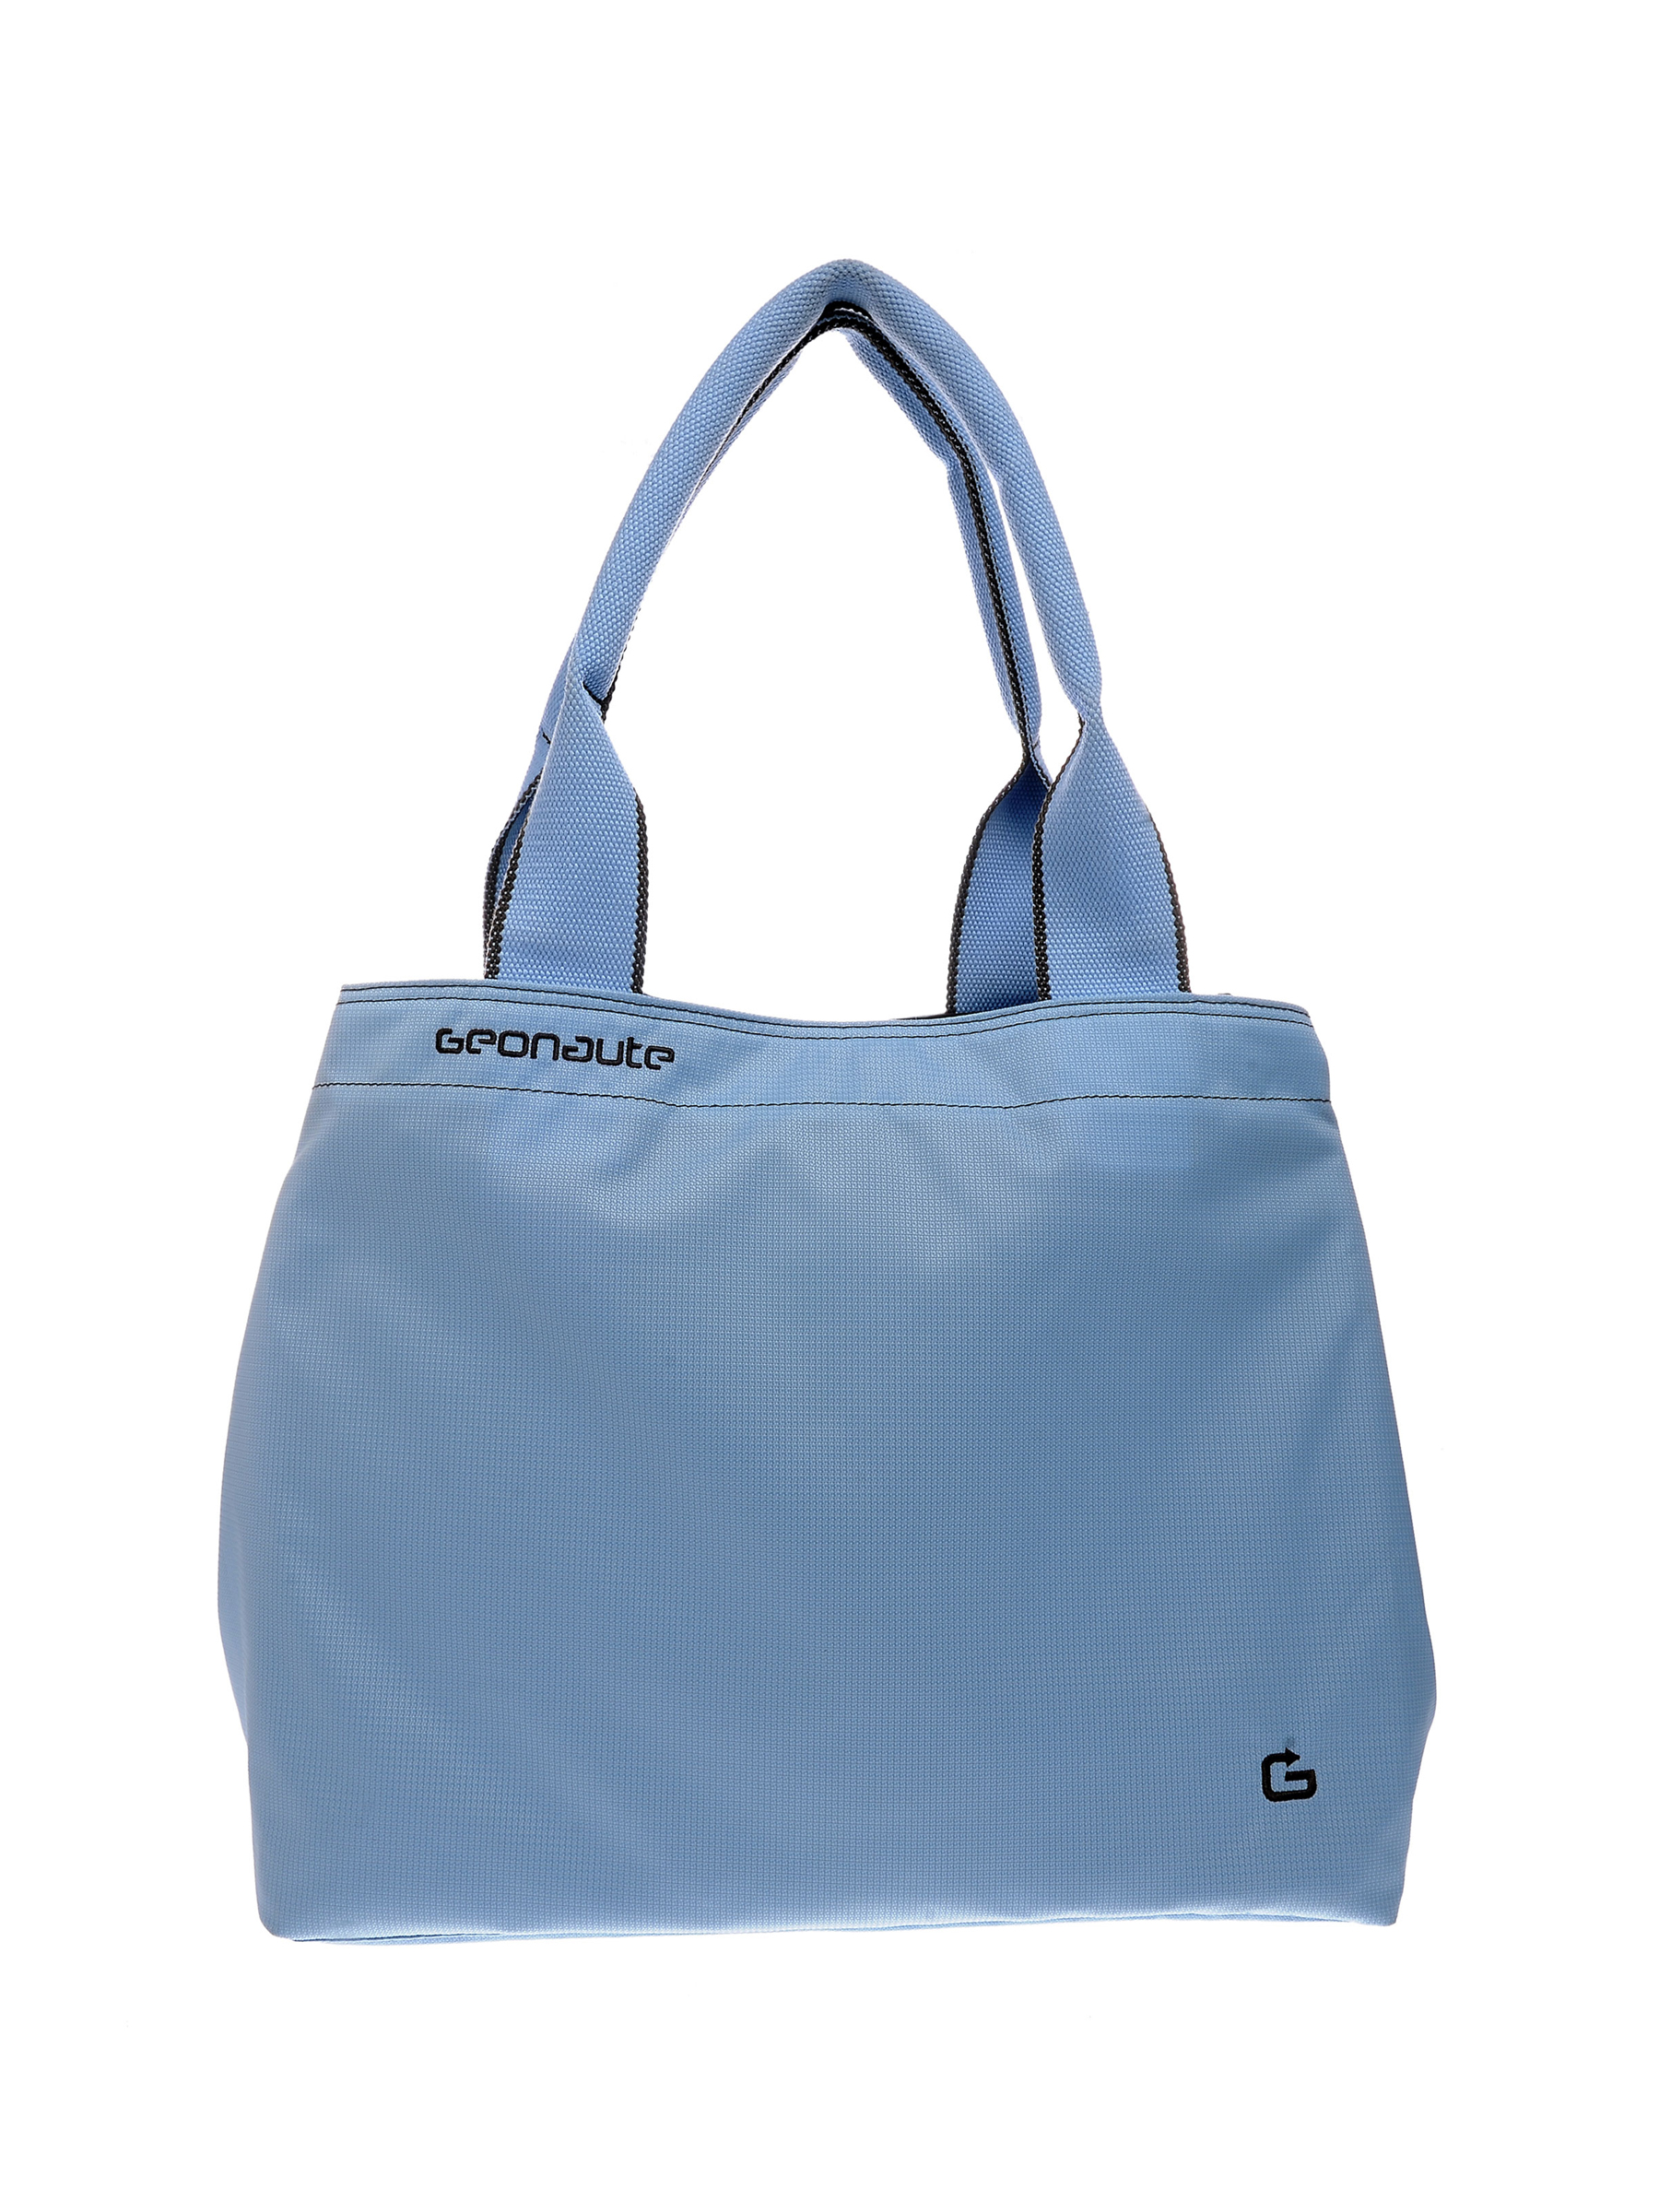

In [107]:
display(Image('1939.jpg', width=100))

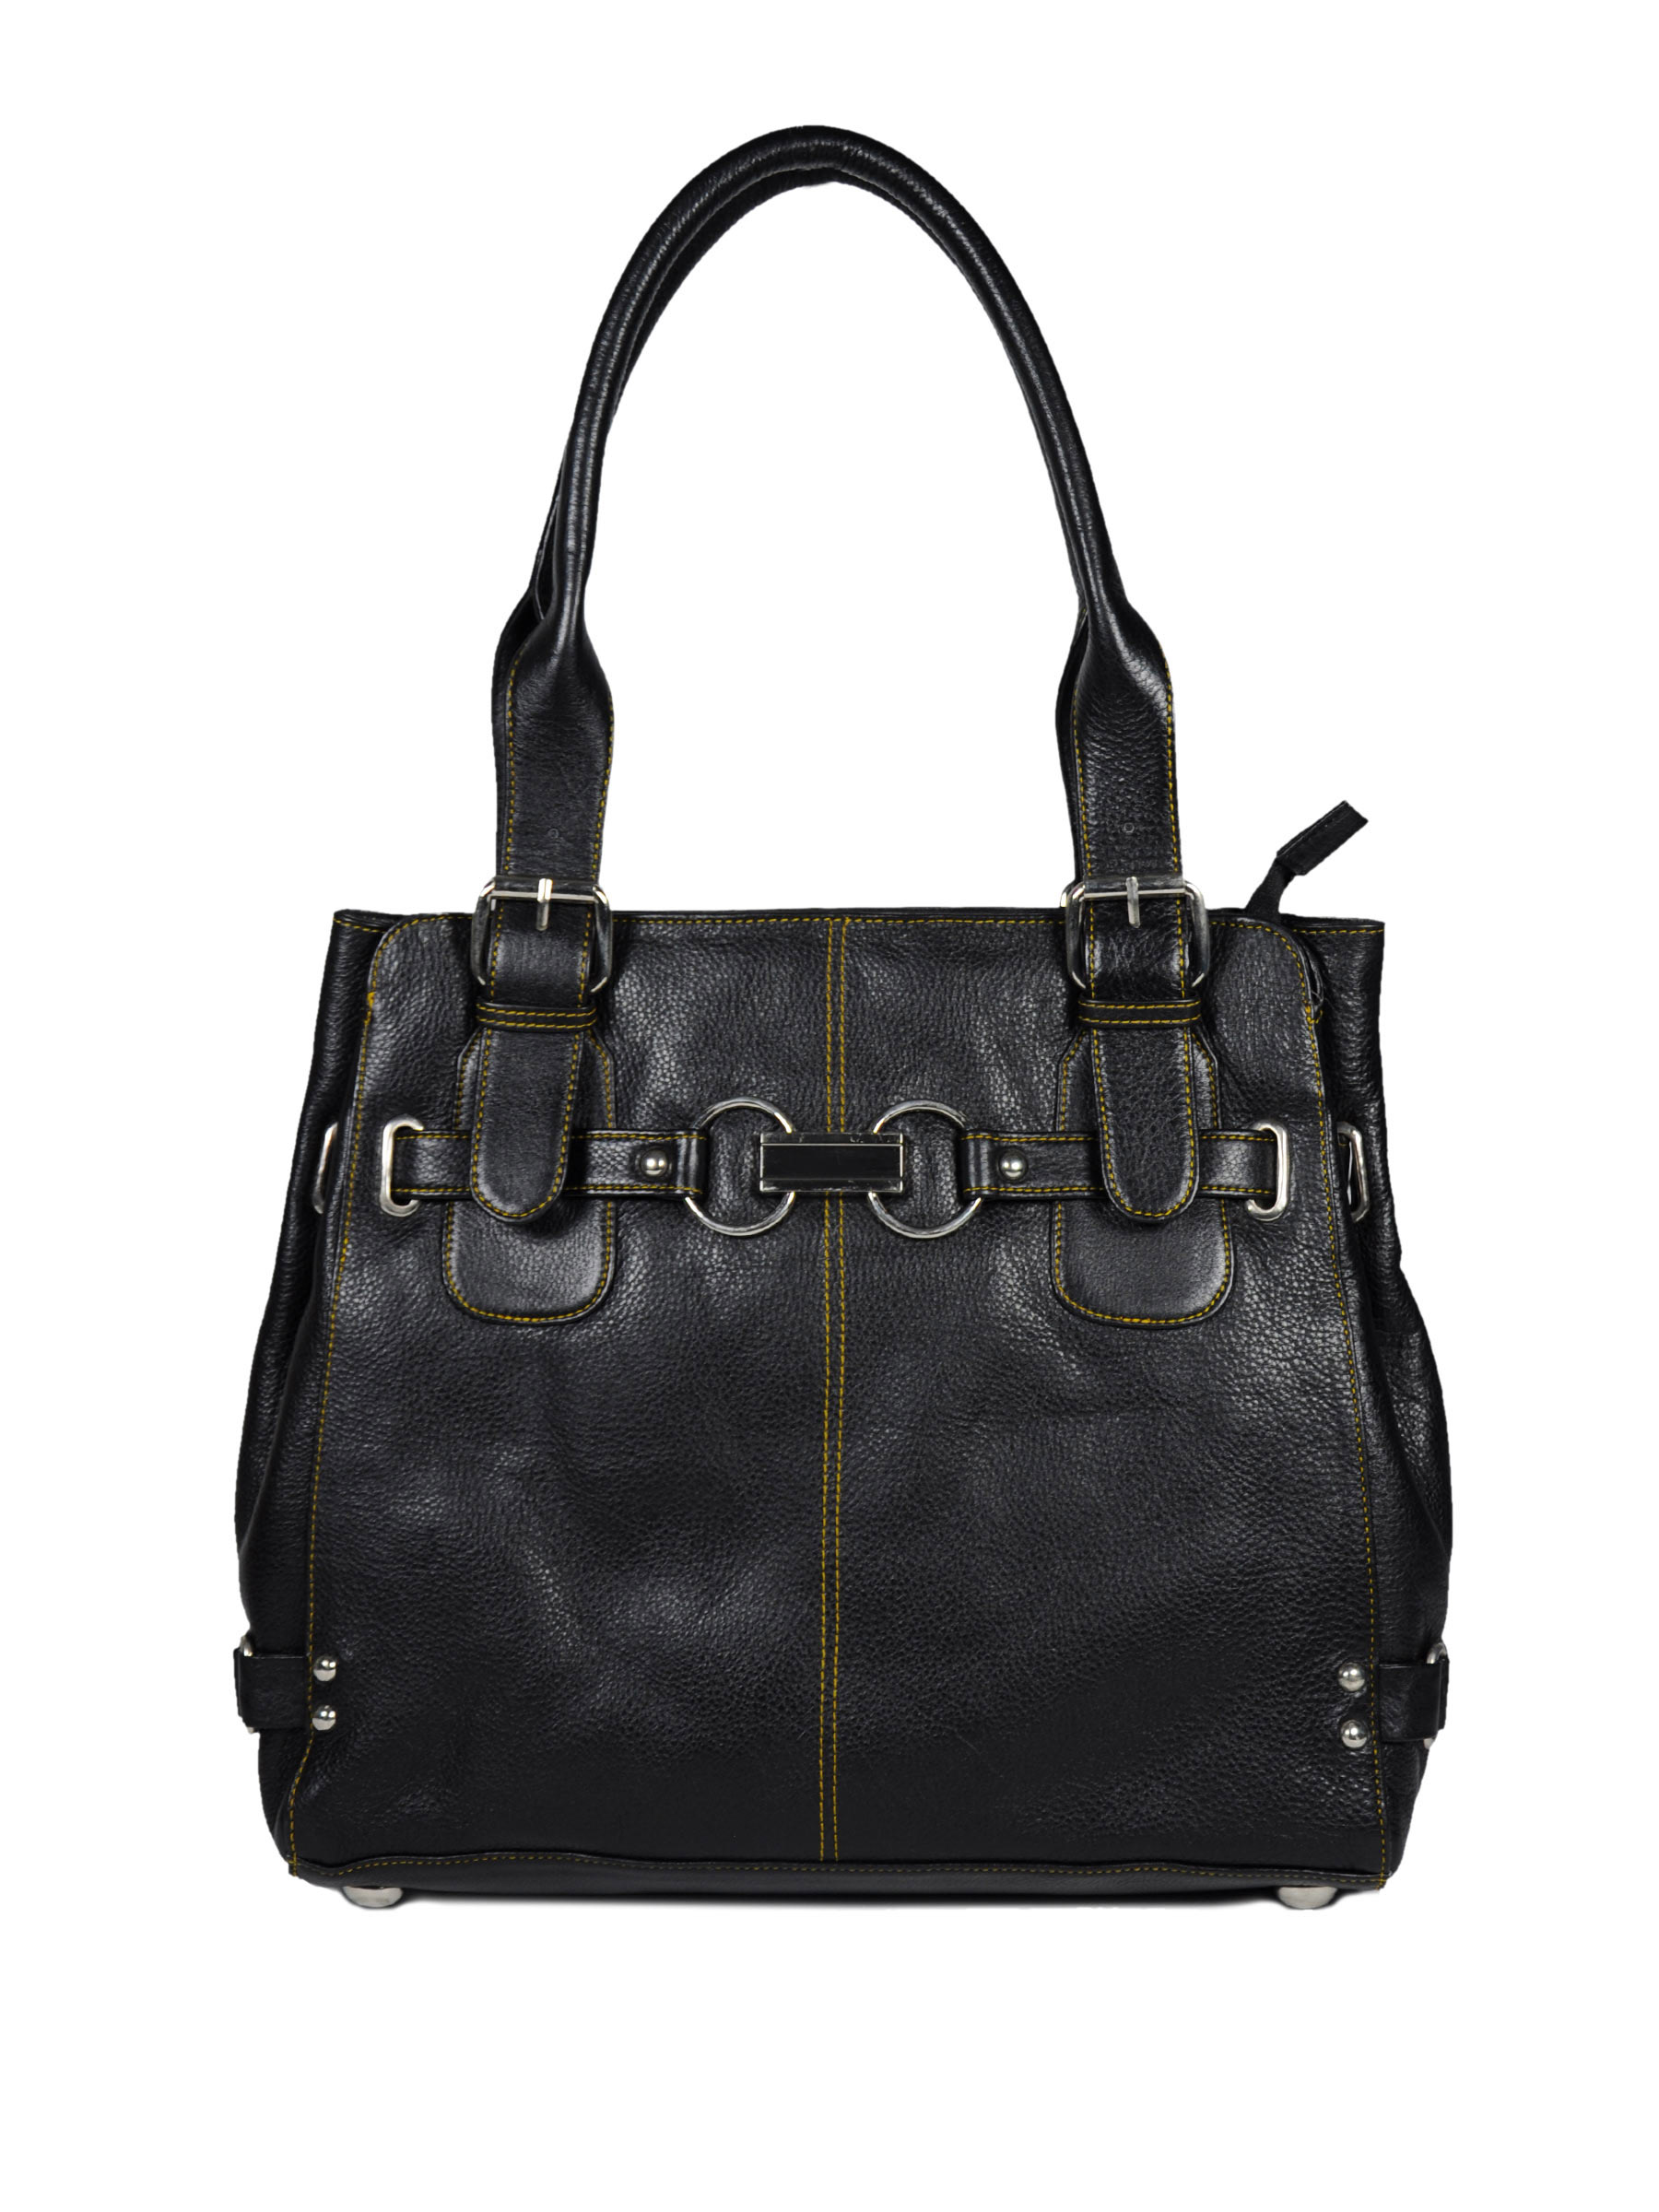

In [108]:
Image(filenames[indices[0][0]],width=100) 

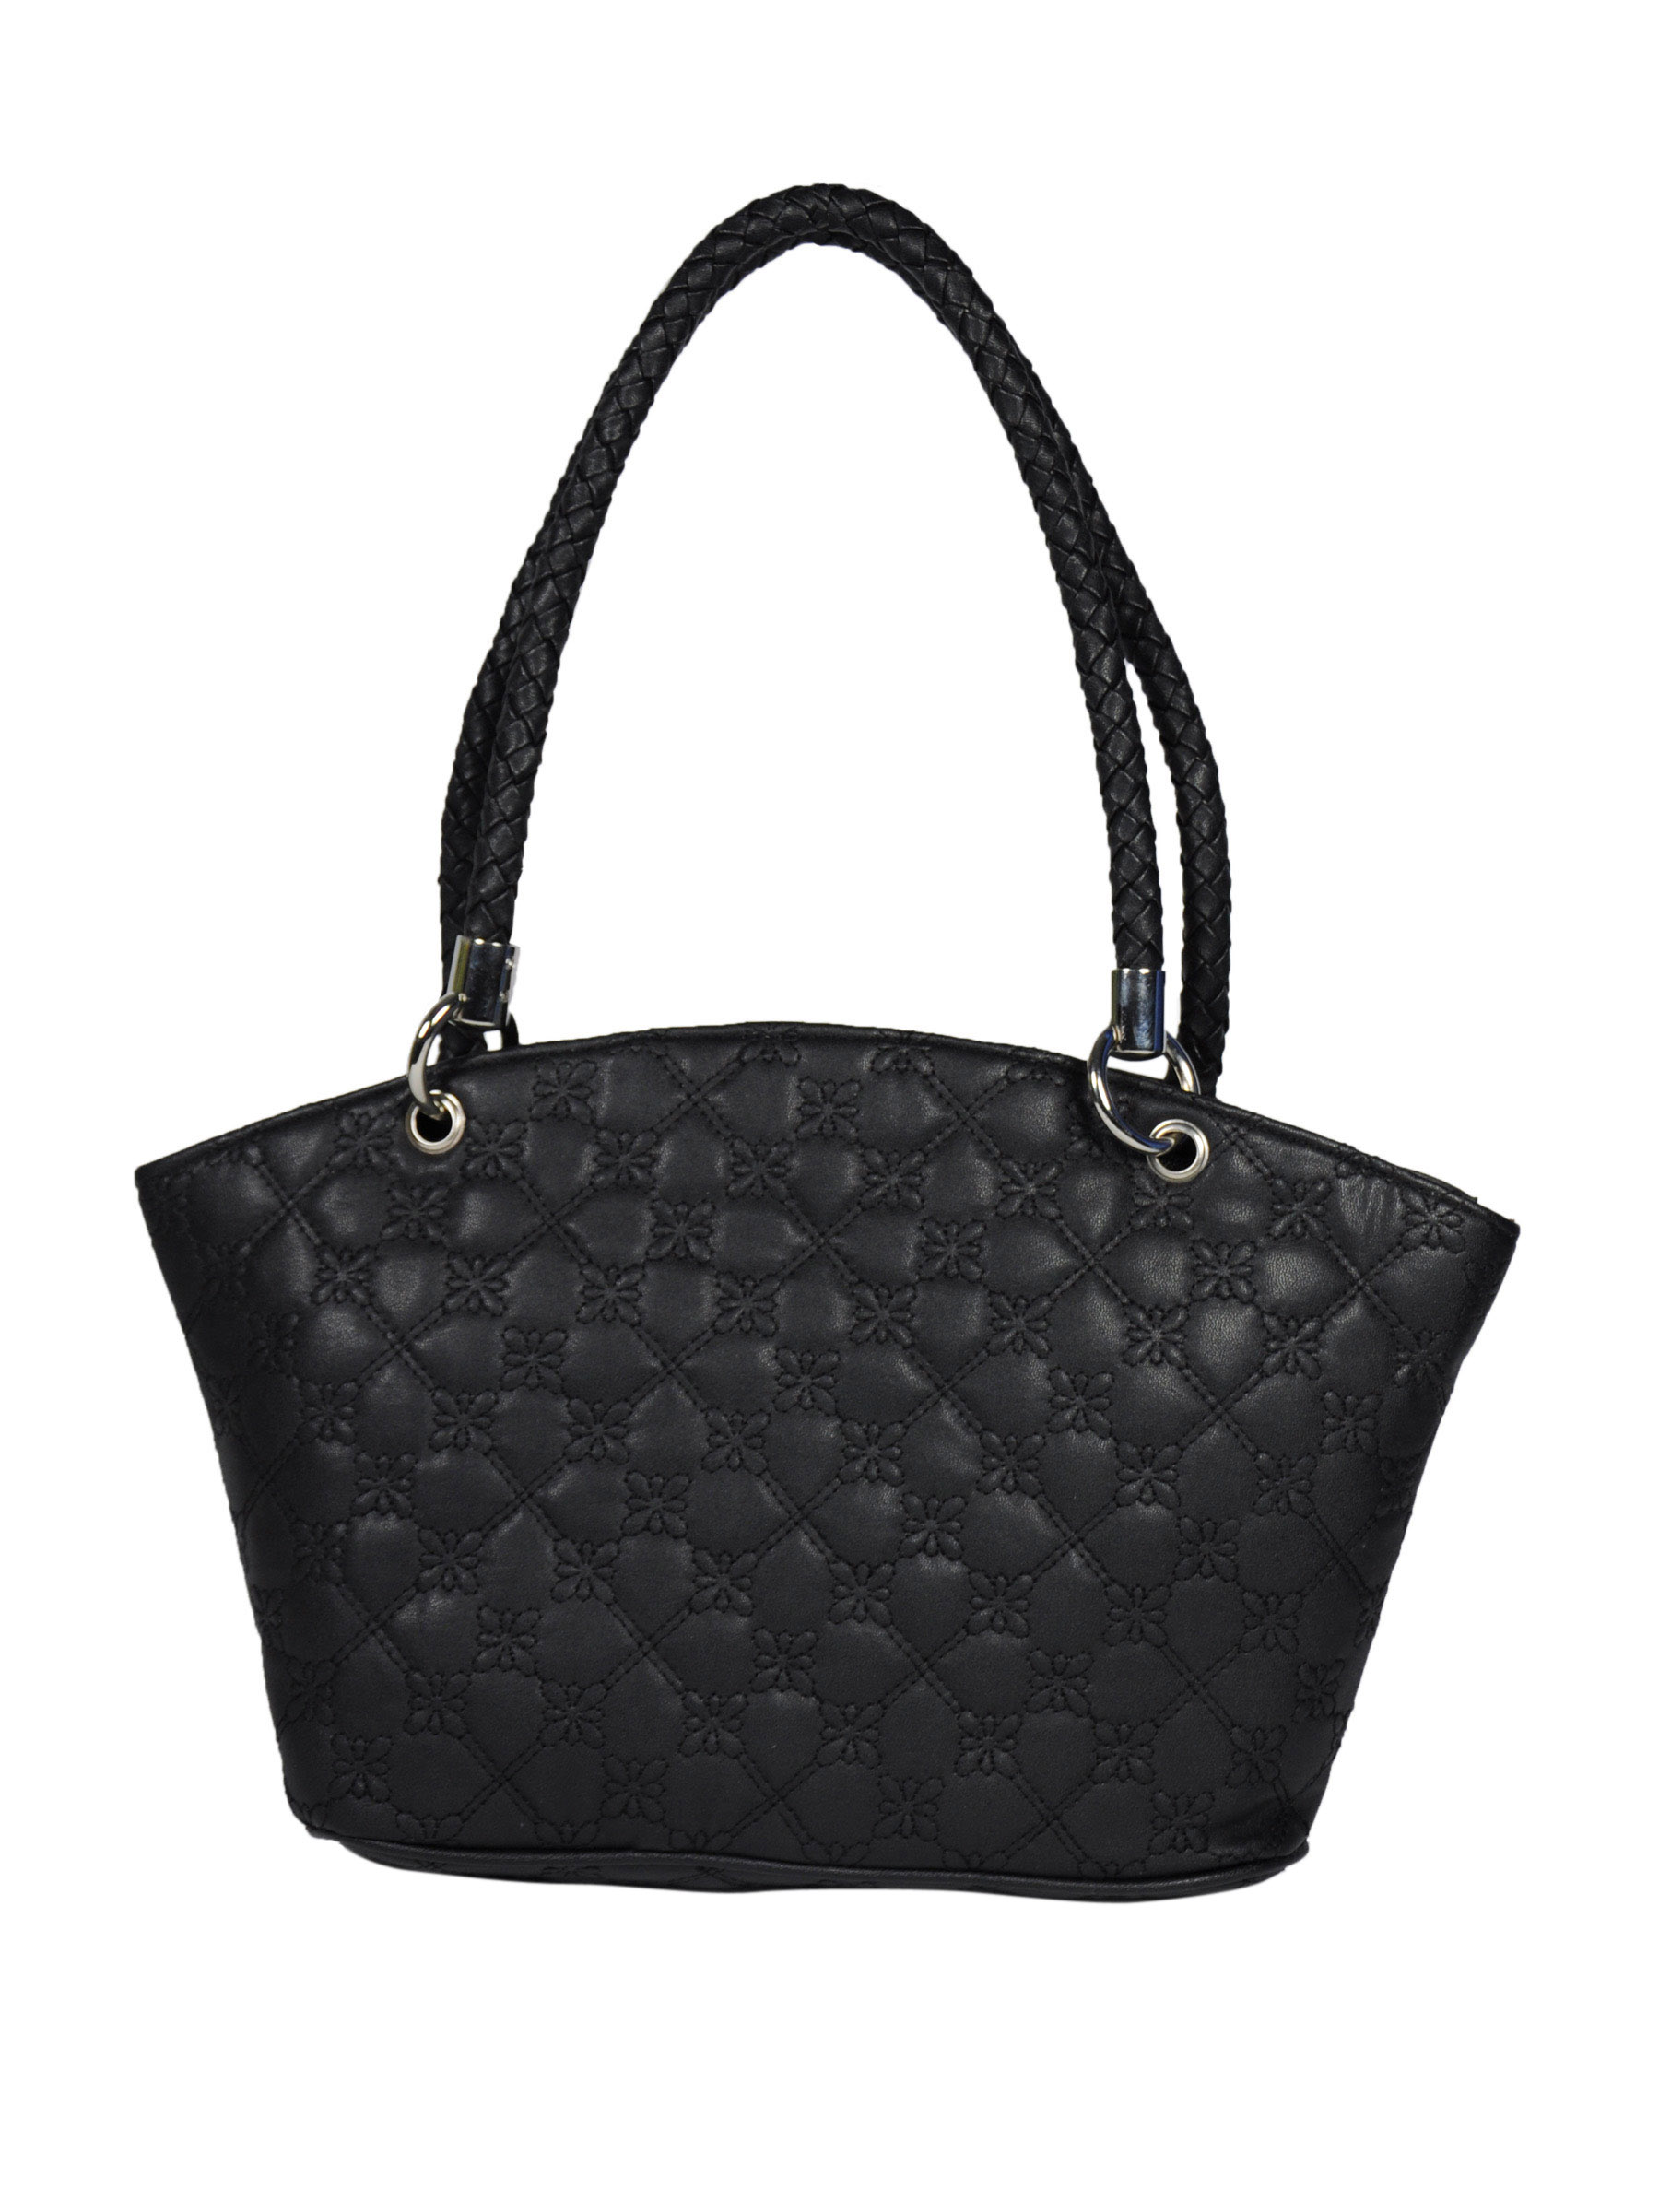

In [109]:
Image(filenames[indices[0][1]],width=100) 

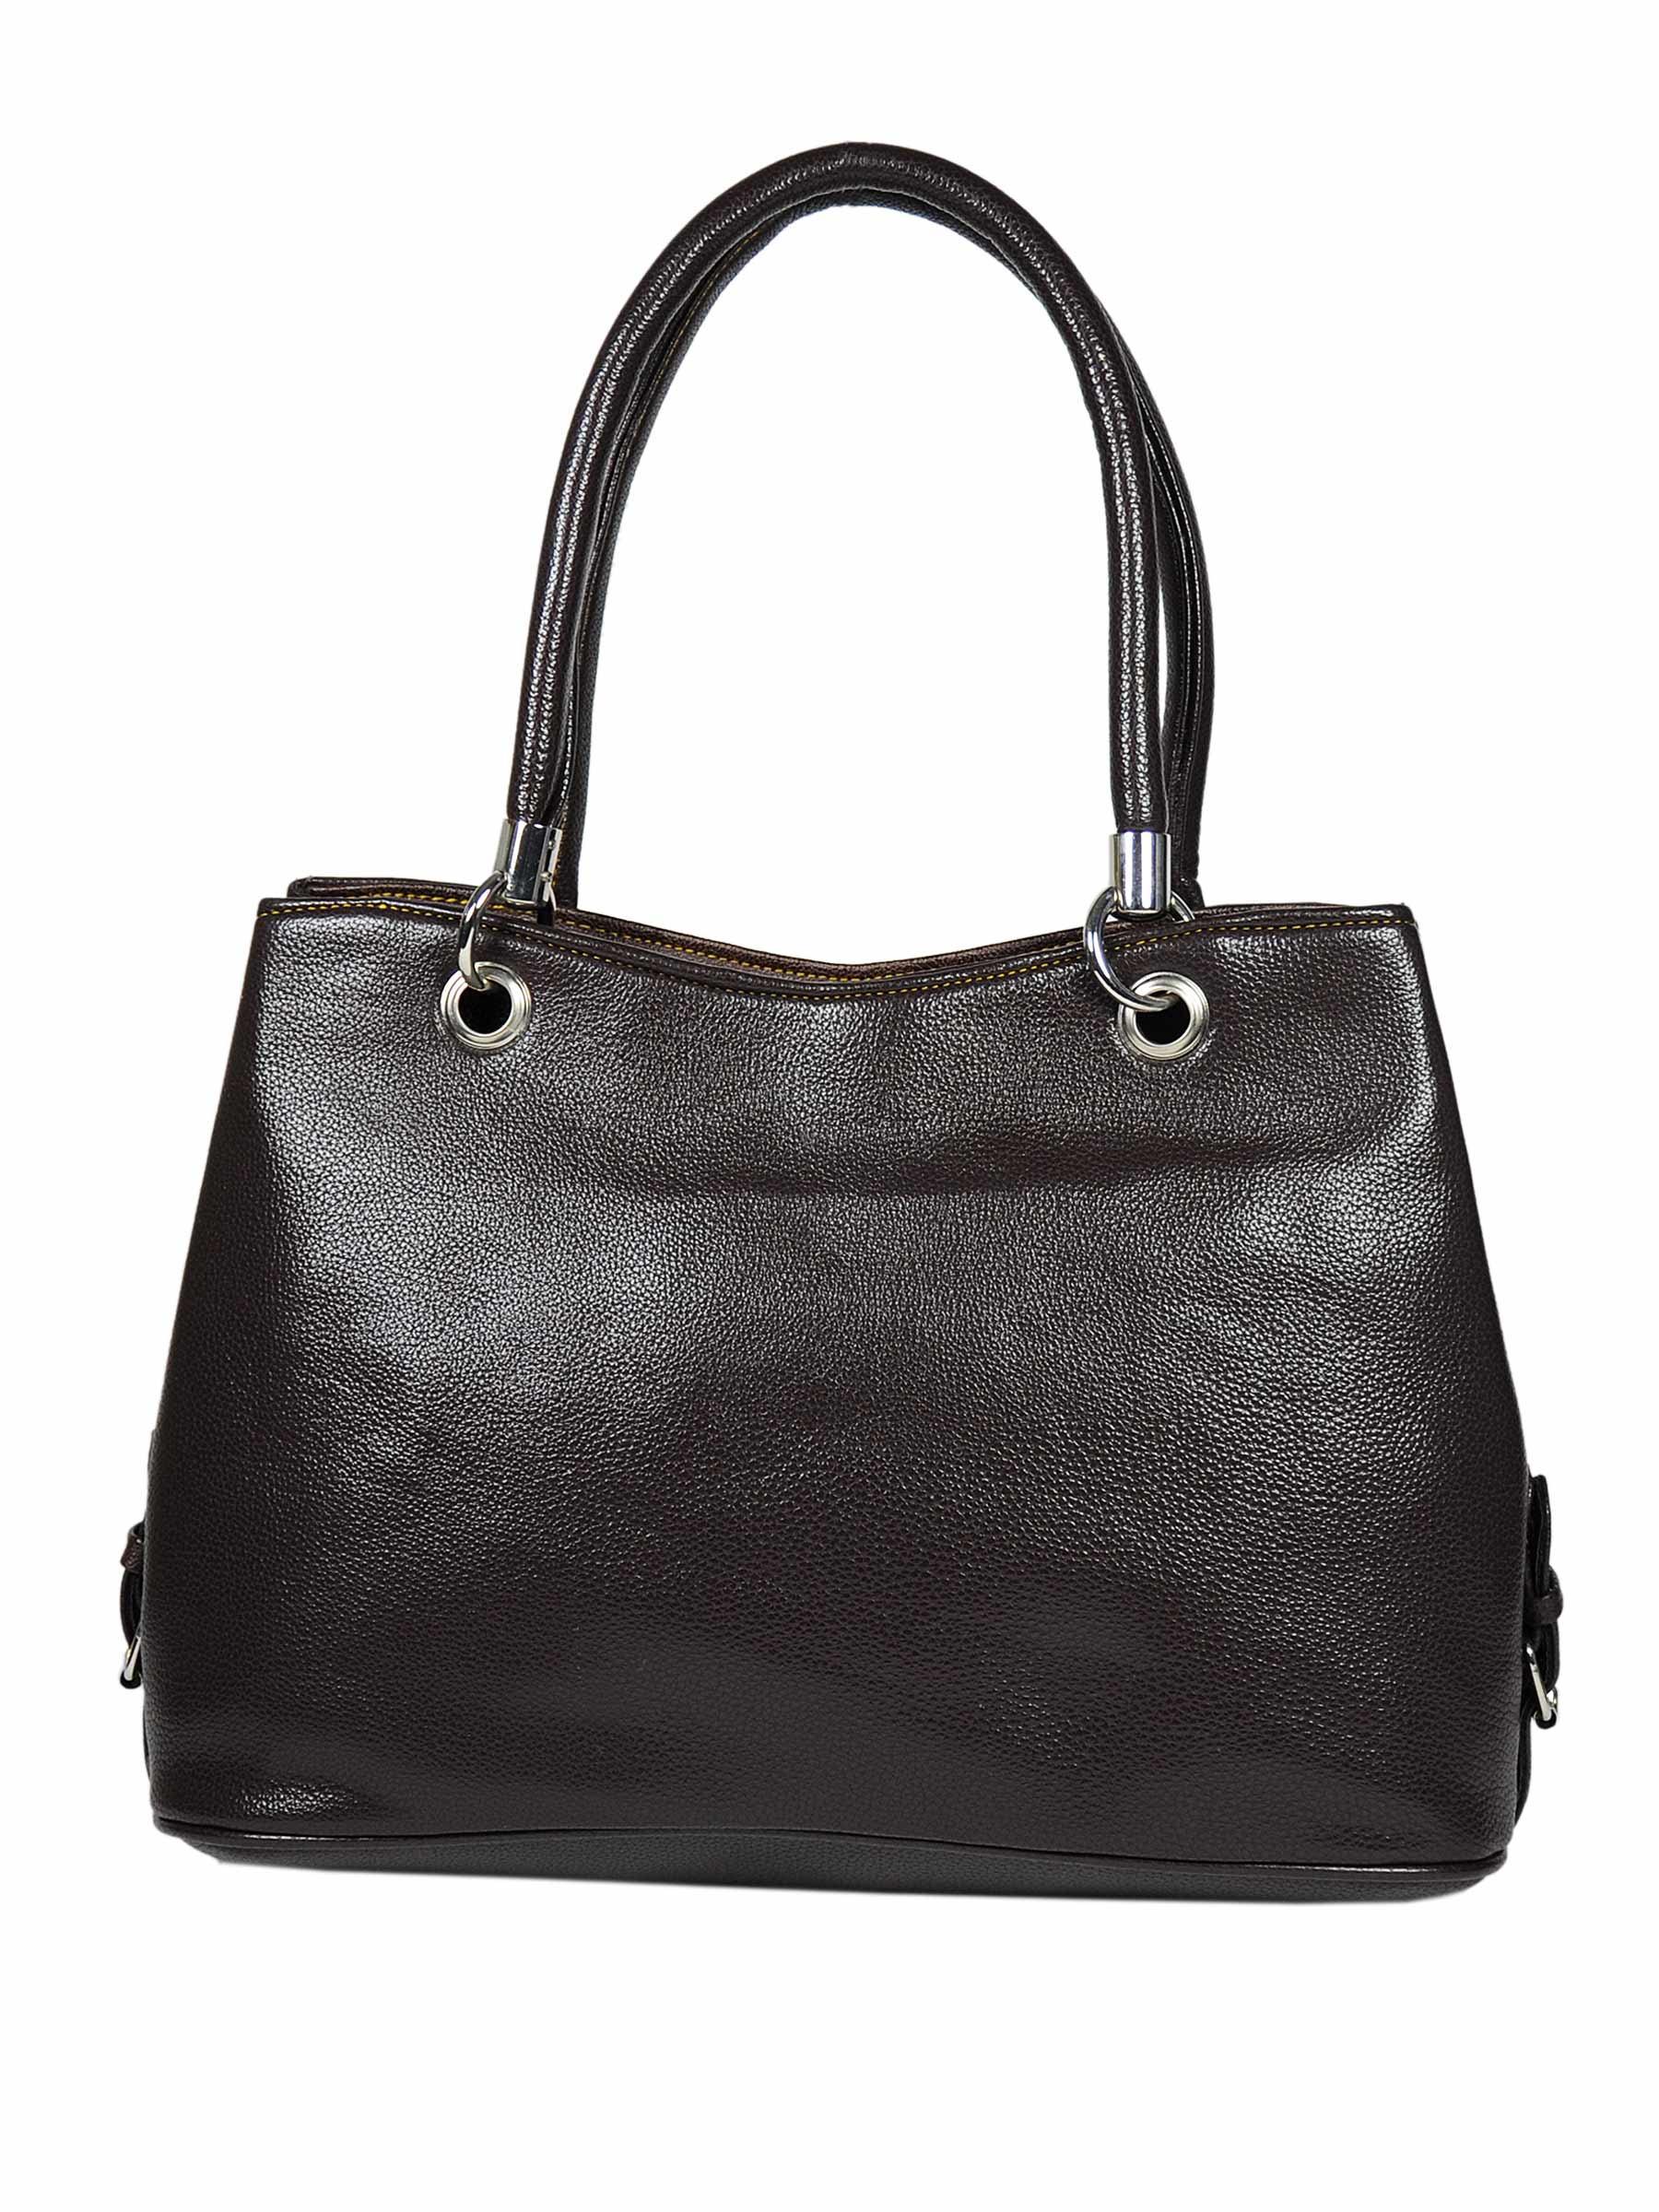

In [110]:
Image(filenames[indices[0][2]],width=100) 

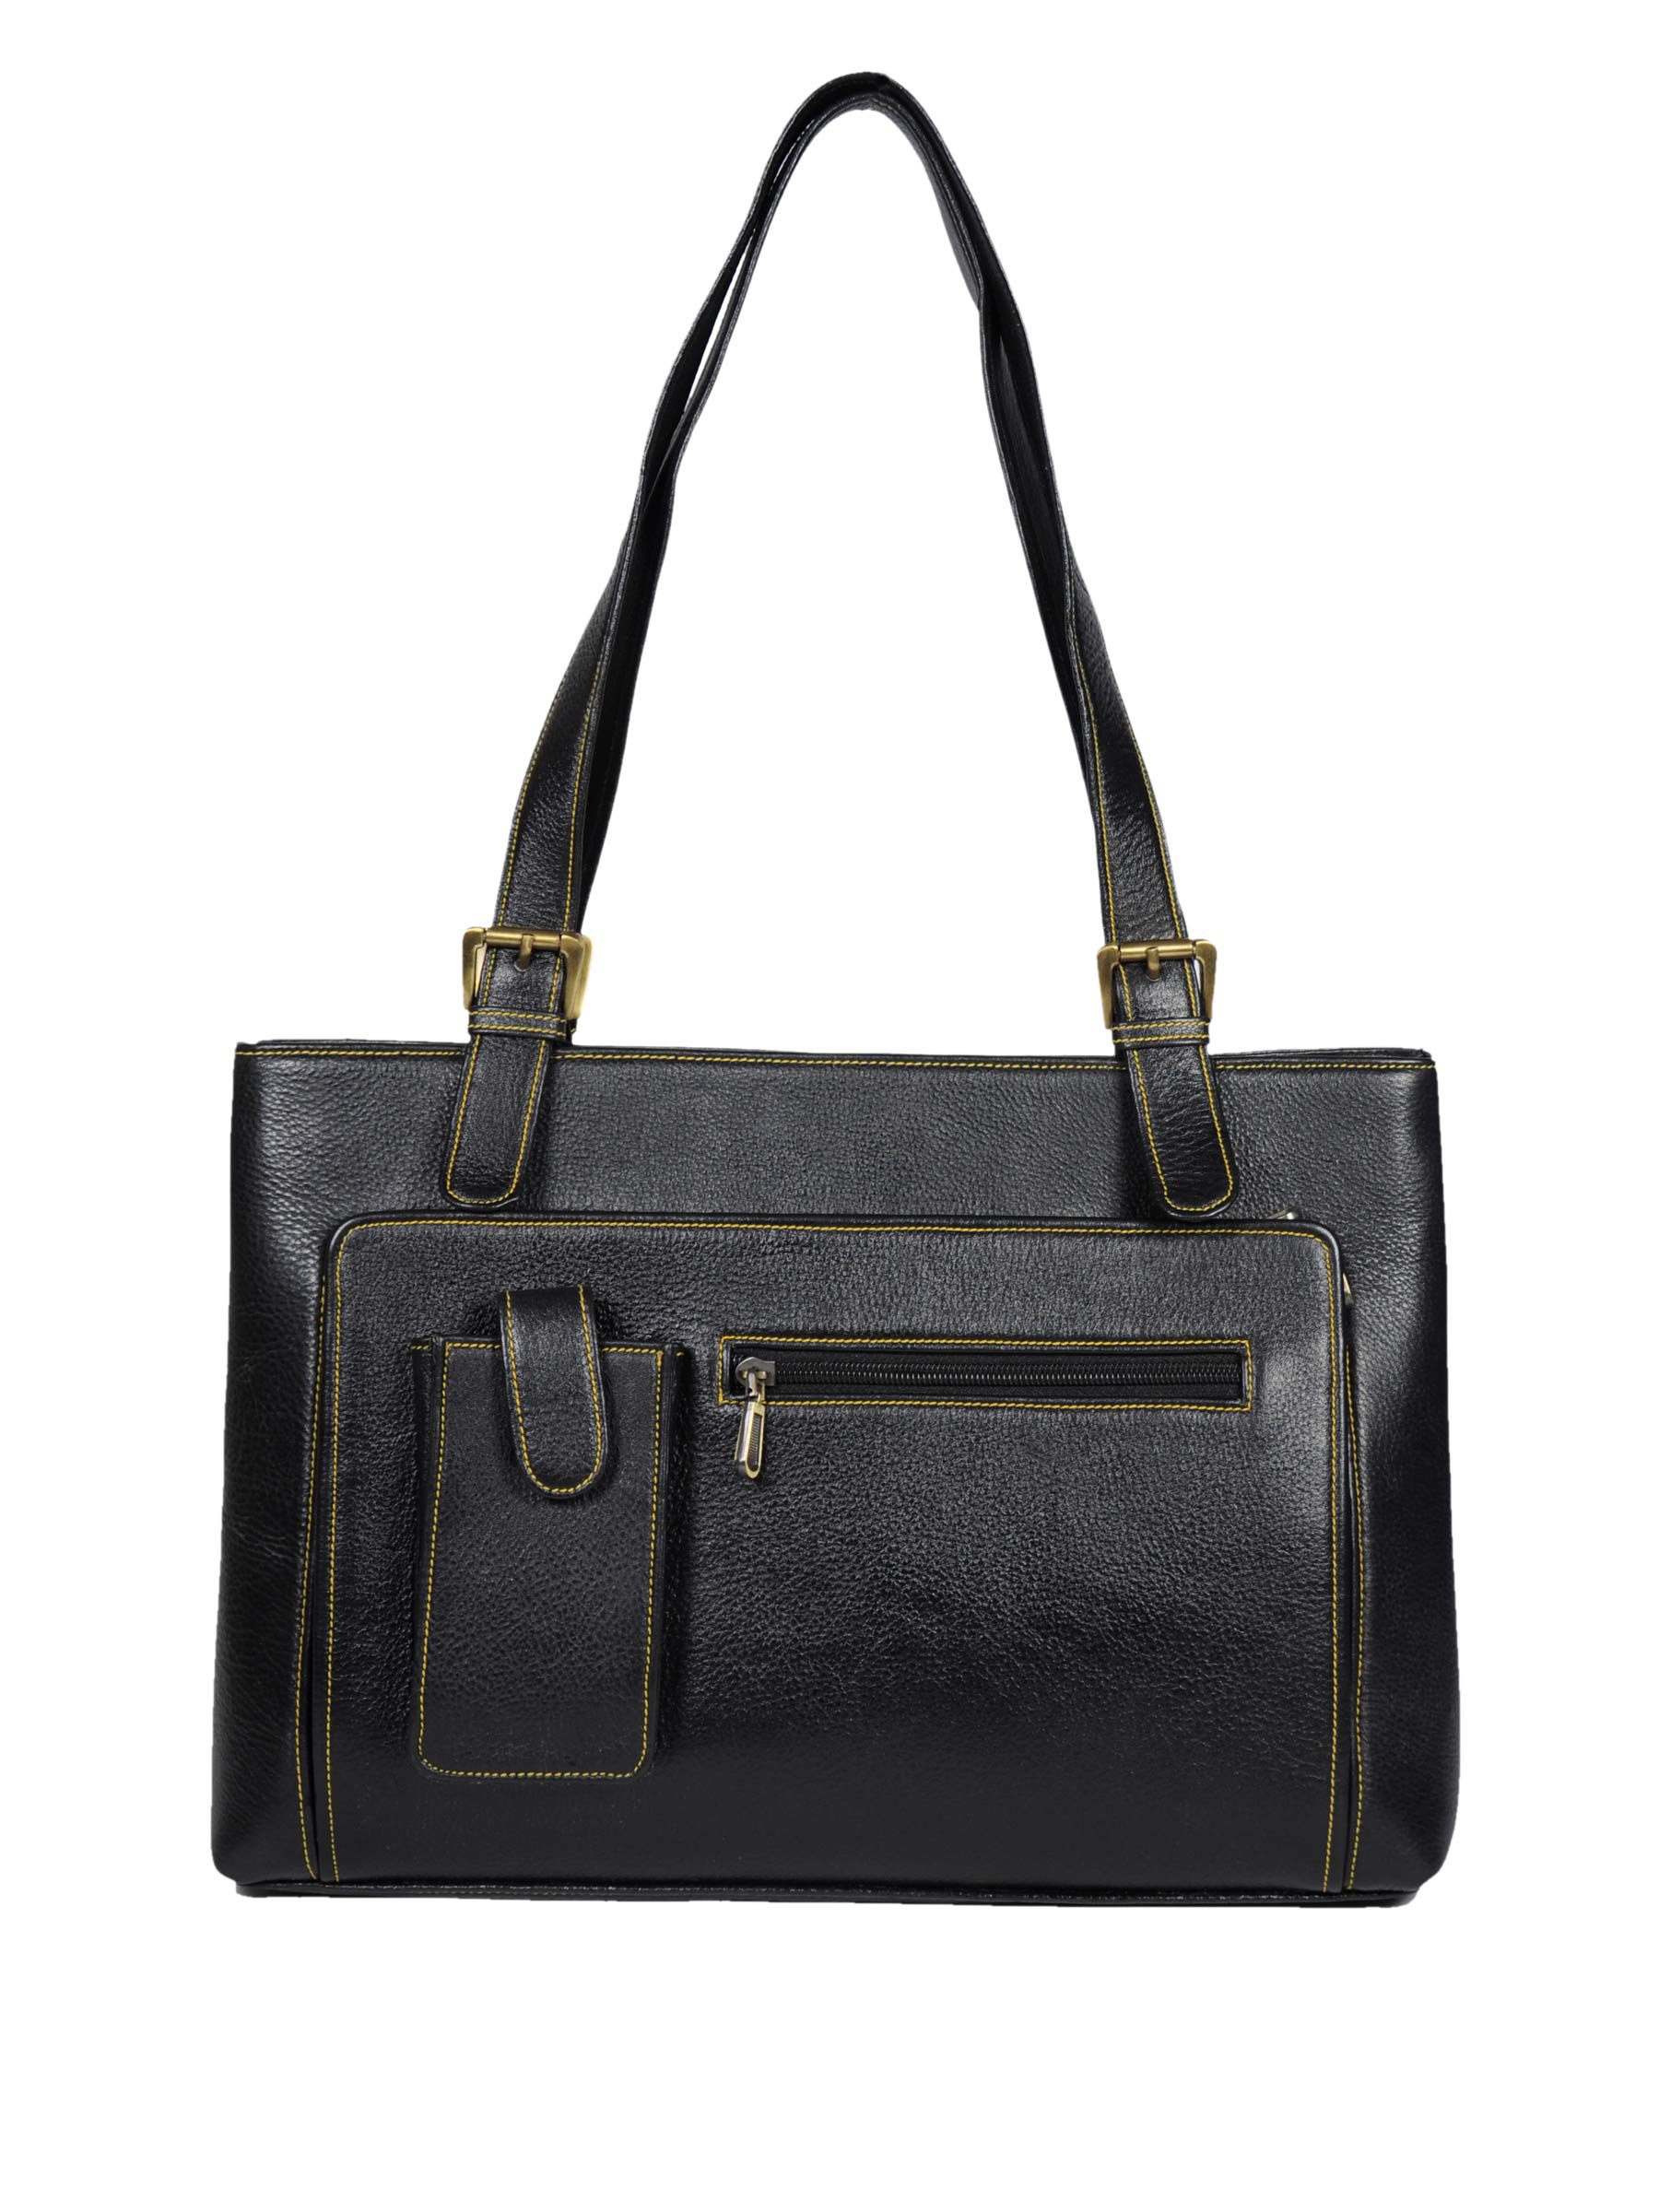

In [111]:
Image(filenames[indices[0][3]],width=100) 

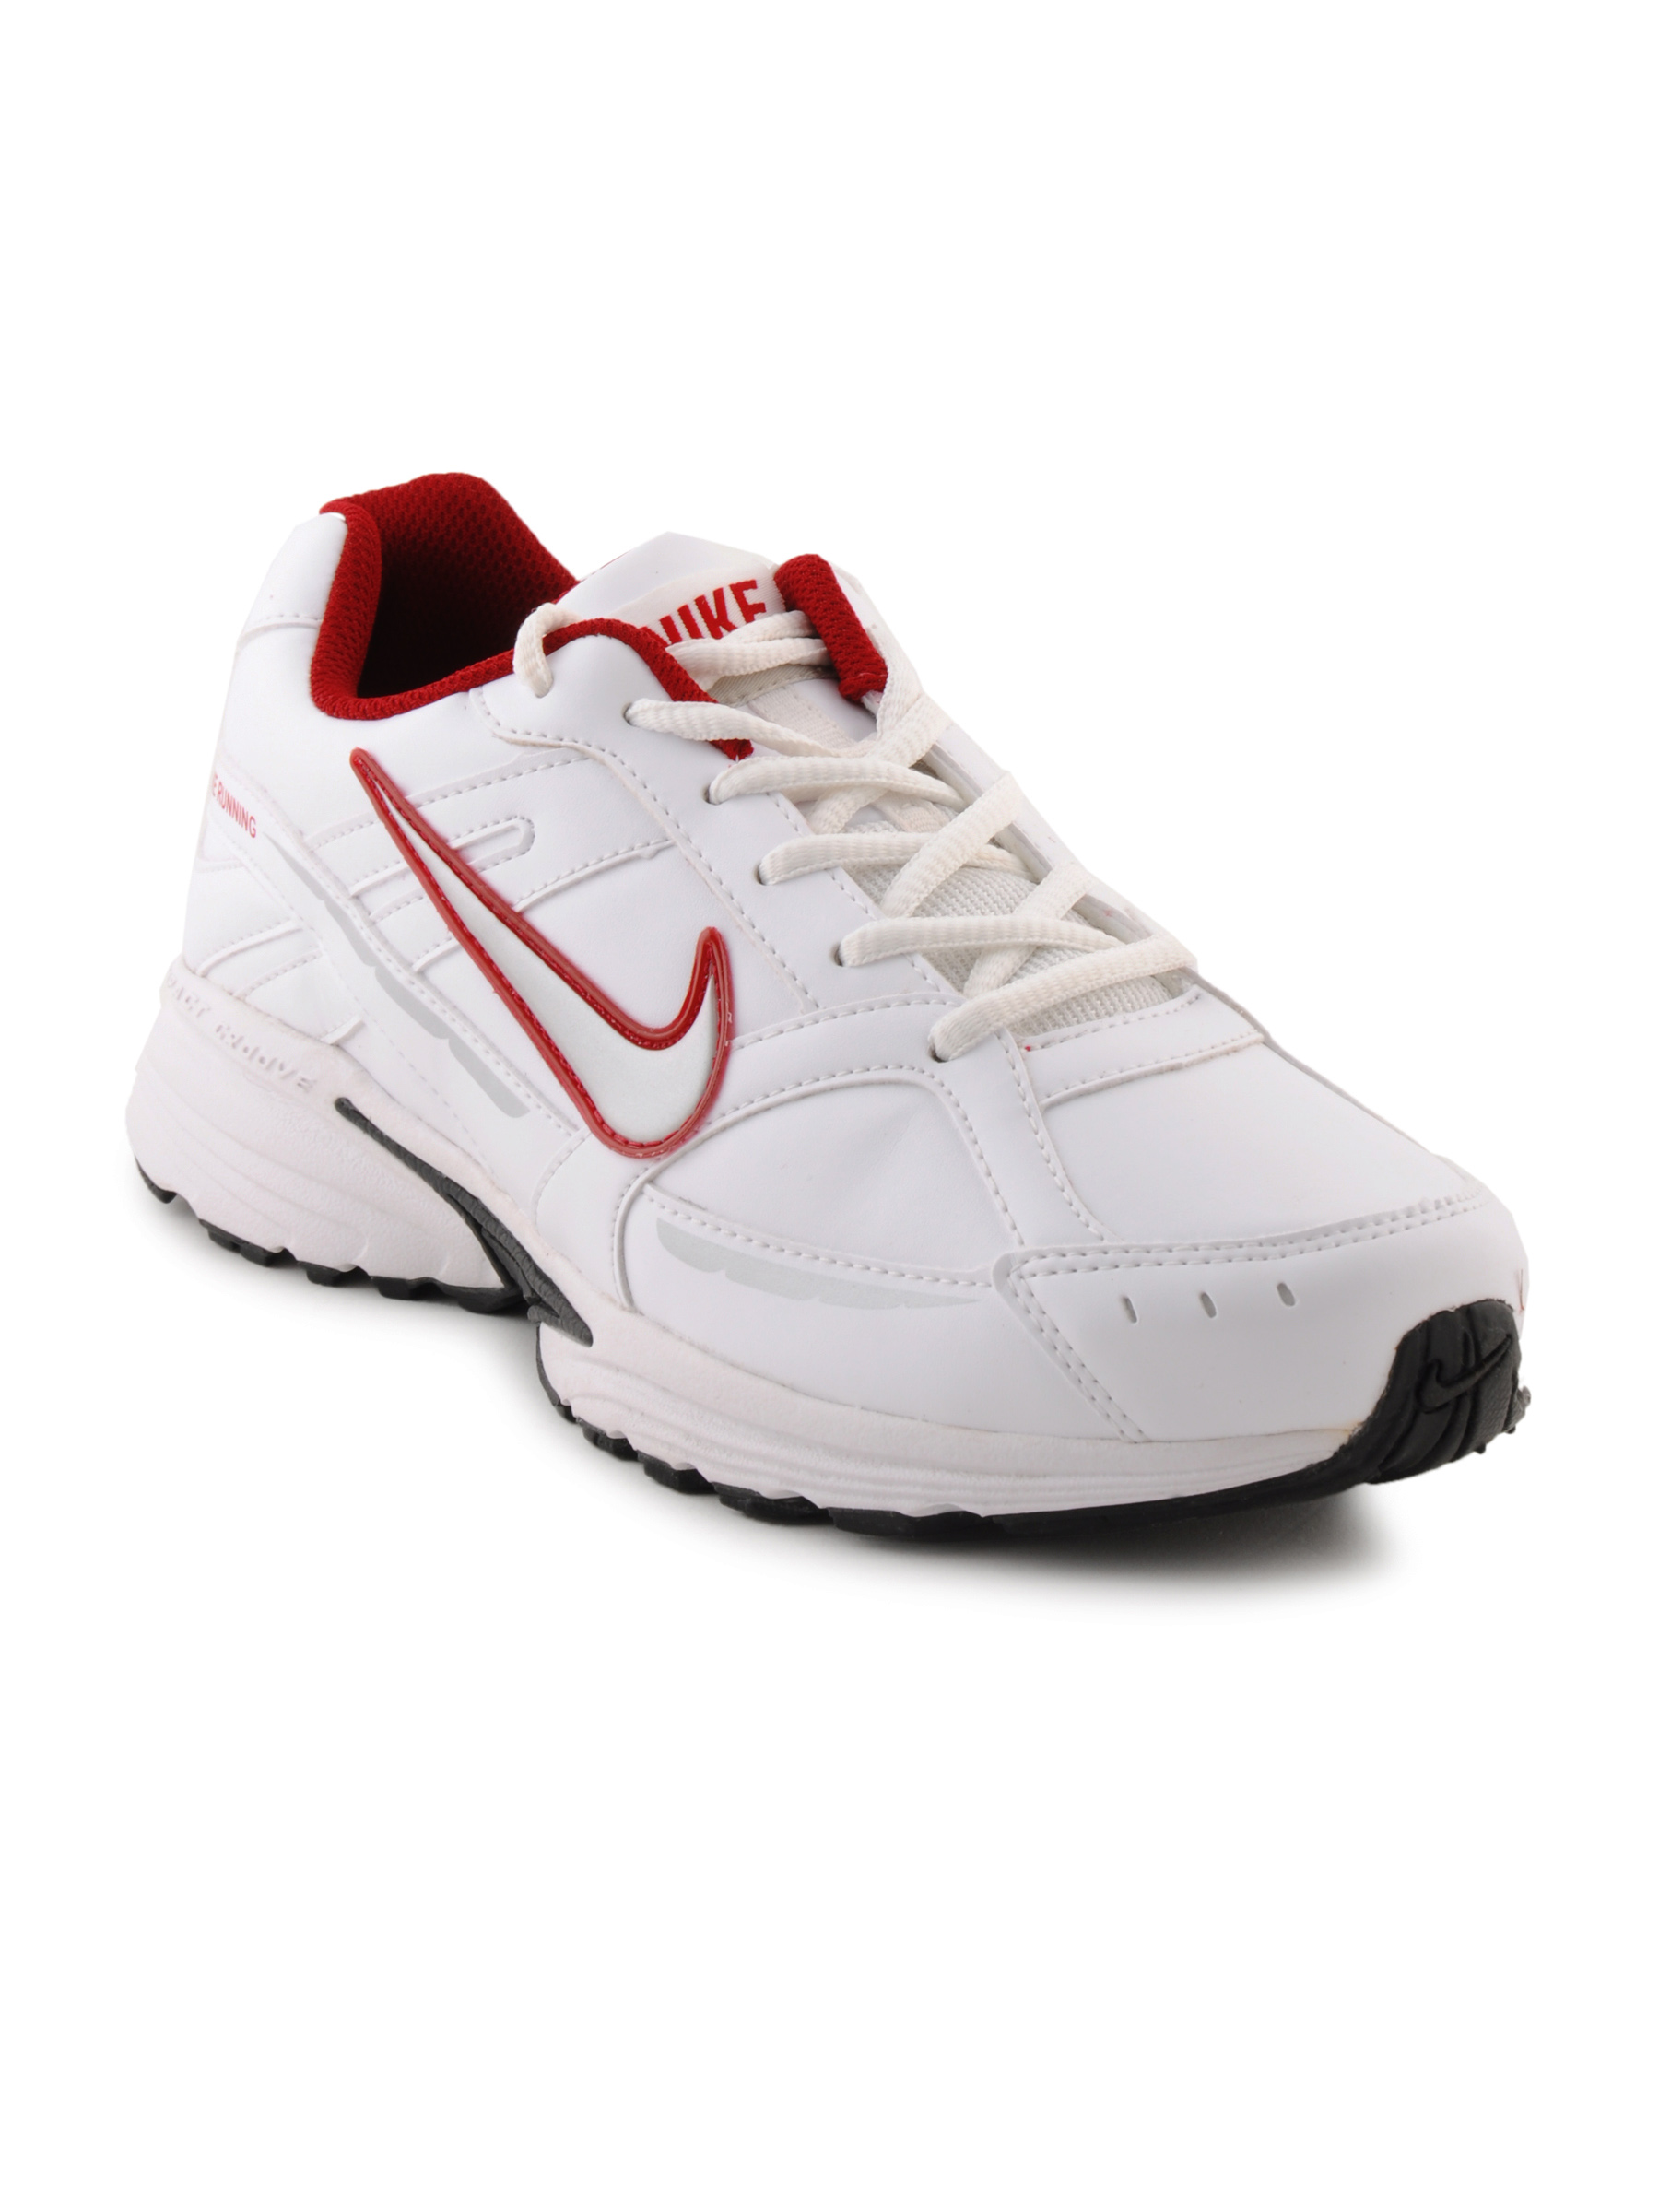

In [100]:
Image(filenames[indices[0][4]],width=100) 

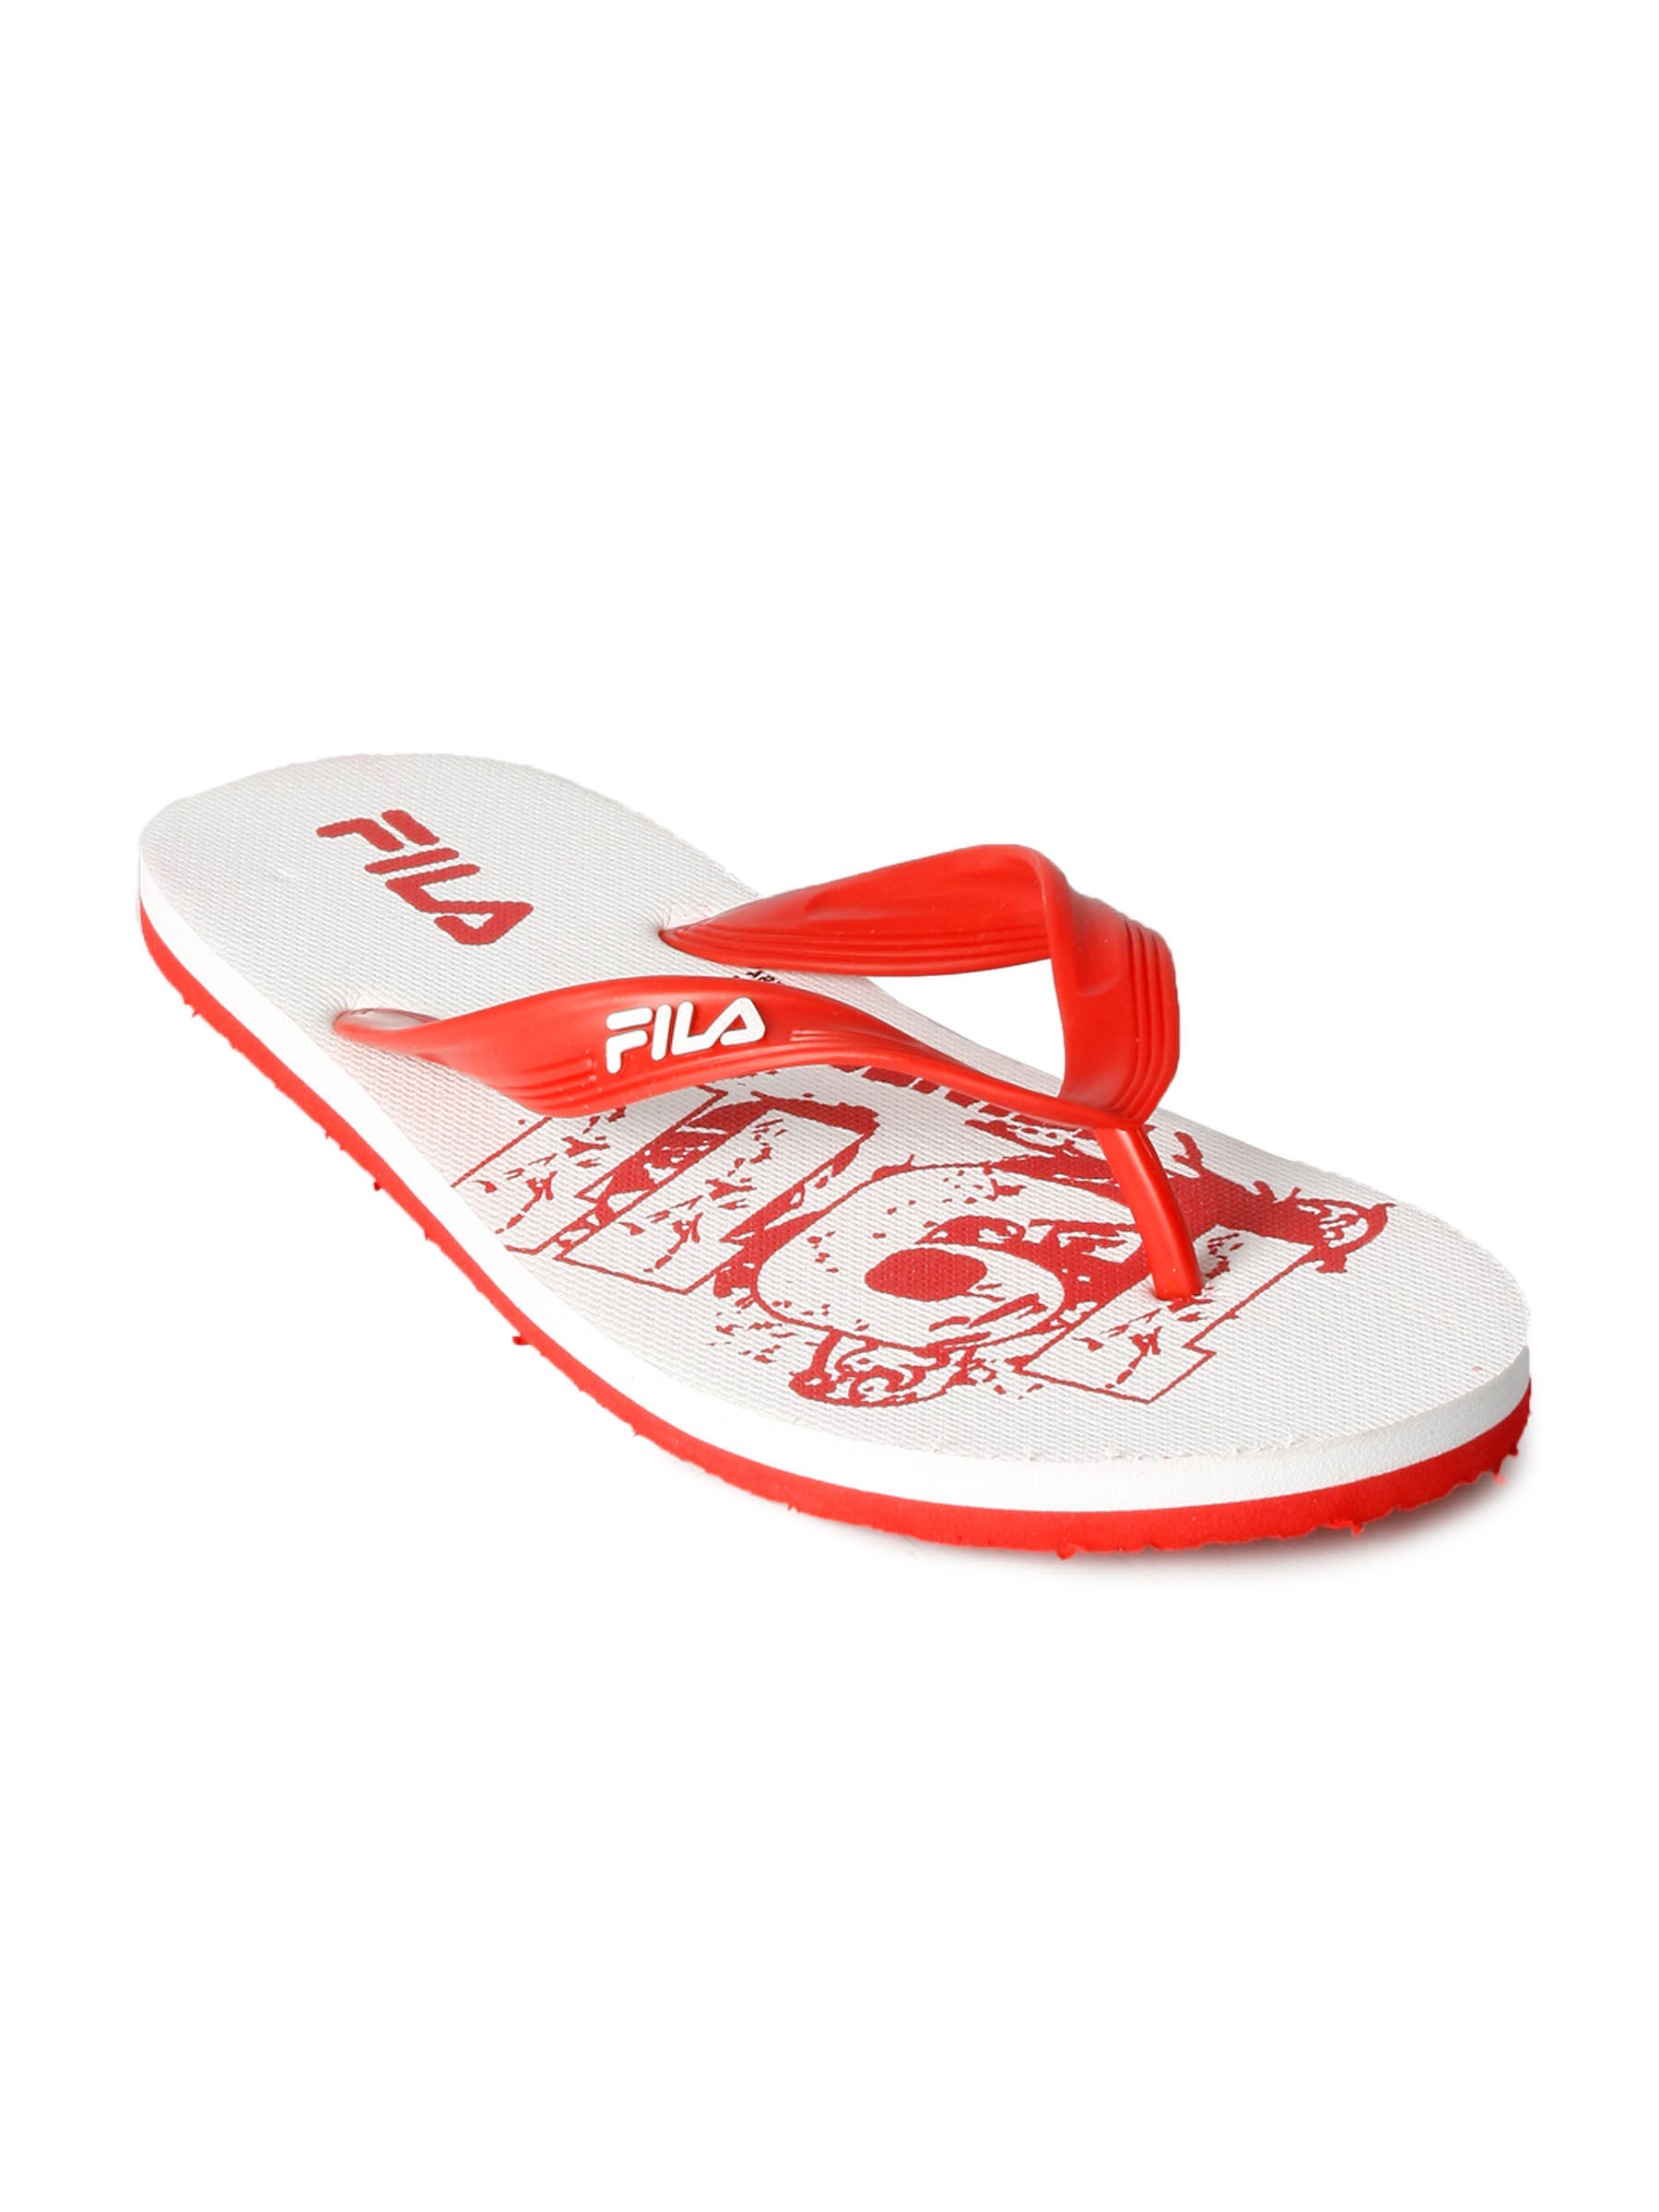

In [102]:
Image(filenames[indices[0][5]],width=100) 